In [1]:
import random
import numpy as np
from simulations import simulate_bids, simulate_regrets
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seed
random.seed(42)
np.random.seed(63)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Generate bids

In [2]:
norm_bids_dict = simulate_bids(
    dist_name="truncnorm",
    lower=0.9,
    upper=10.1,
    max_N=1000,
    max_n=100,
    max_N_train=200,
    max_n_train=1000,
)
expon_bids_dict = simulate_bids(
    dist_name="truncexpon",
    lower=0.9,
    upper=10.1,
    max_N=1000,
    max_n=100,
    max_N_train=200,
    max_n_train=1000,
)
pareto_bids_dict = simulate_bids(
    dist_name="truncpareto",
    lower=0.9,
    upper=10.1,
    max_N=1000,
    max_n=100,
    max_N_train=200,
    max_n_train=1000,
)

/Users/qiqi/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


# Run auctions

In [3]:
dist_names = ["truncnorm", "truncexpon", "truncpareto"]
bids_dicts = [norm_bids_dict, expon_bids_dict, pareto_bids_dict]
ns = [10, 20, 50, 100]
N_trains = [25, 50, 200]
n_trains = [10, 100, 1000]

In [ ]:
regrets_dict = {}
for i, dist_name in enumerate(dist_names):
    regrets_to_plot = []
    for n in ns:
        regrets_to_plot.append(simulate_regrets(bids_dicts[i], "ecdf", N=1000, n=n))
        regrets_to_plot.append(simulate_regrets(bids_dicts[i], "kde", N=1000, n=n))
        for N_train in N_trains:
            for n_train in n_trains:
                regrets_to_plot.append(
                    simulate_regrets(
                        bids_dicts[i],
                        "rde",
                        N=1000,
                        n=n,
                        N_train=N_train,
                        n_train=n_train,
                    )
                )
    regrets_dict[dist_name] = regrets_to_plot

In [5]:
import pickle

# Write object to a file
with open("regrets.pkl", "wb") as file:
    pickle.dump(regrets_dict, file)

In [6]:
import pickle

# Read object back from the file
with open("regrets.pkl", "rb") as file:
    regrets_dict = pickle.load(file)

In [7]:
def regrets_plot(regrets):
    # Define custom colors for groups of three in different shades
    legend_colors = {
        "ecdf": "#FF69B4",  # pink
        "kde": "#800080",  # purple
        "rde(25x10)": "#ADD8E6",  # light blue
        "rde(25x100)": "#4682B4",  # blue
        "rde(25x1000)": "#00008B",  # dark blue
        "rde(50x10)": "#98FB98",  # light green
        "rde(50x100)": "#32CD32",  # green
        "rde(50x1000)": "#006400",  # dark green
        "rde(200x10)": "#FFD700",  # light yellow
        "rde(200x100)": "#FFA500",  # orange
        "rde(200x1000)": "#FF4500",  # dark orange
    }
    titles = [10, 20, 50, 100]

    # Set up 2x2 subplots
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

    # Plot overlayed KDEs in each subplot with custom colors
    t = 0
    for i in range(2):
        for j in range(2):
            for k, color in enumerate(legend_colors.values()):
                sns.kdeplot(
                    regrets[11 * t + k],
                    ax=axes[i, j],
                    color=color,
                )
            axes[i, j].set_title(f"n={titles[t]}")
            t += 1

    # Create a shared legend for the entire figure
    fig.legend(
        [key for key in legend_colors.keys()],
        loc="center right",
        bbox_to_anchor=(1.25, 0.5),
        title="Legend",
    )

    # Zoom in
    plt.xlim(0, 0.1)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

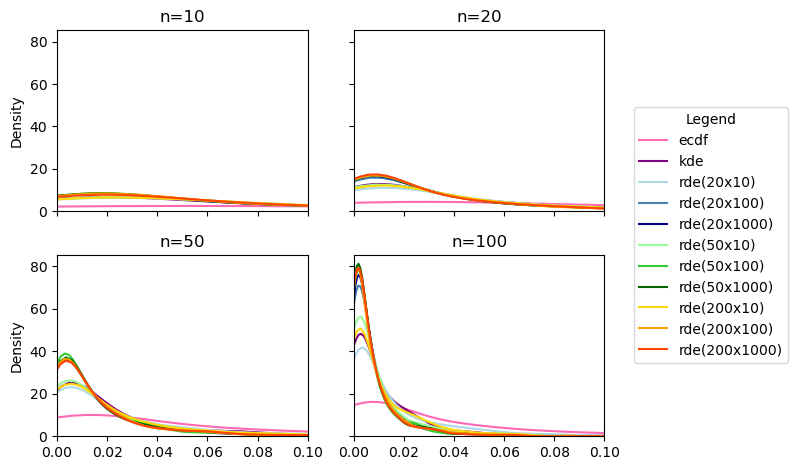

In [8]:
regrets_plot(regrets_dict["truncnorm"])

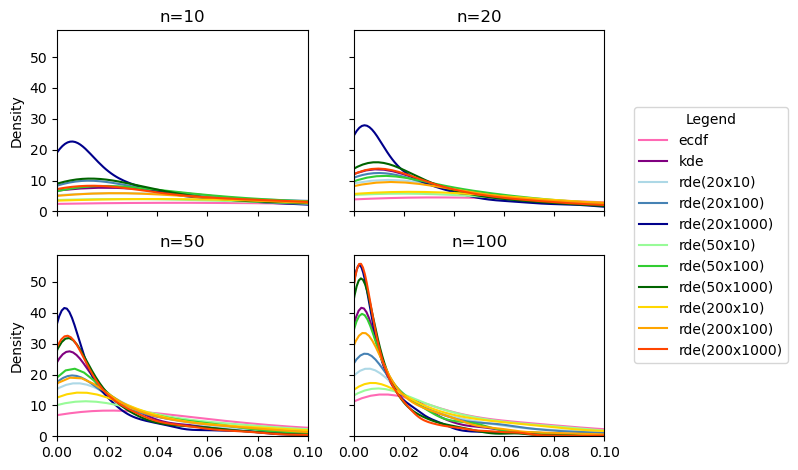

In [9]:
regrets_plot(regrets_dict["truncexpon"])

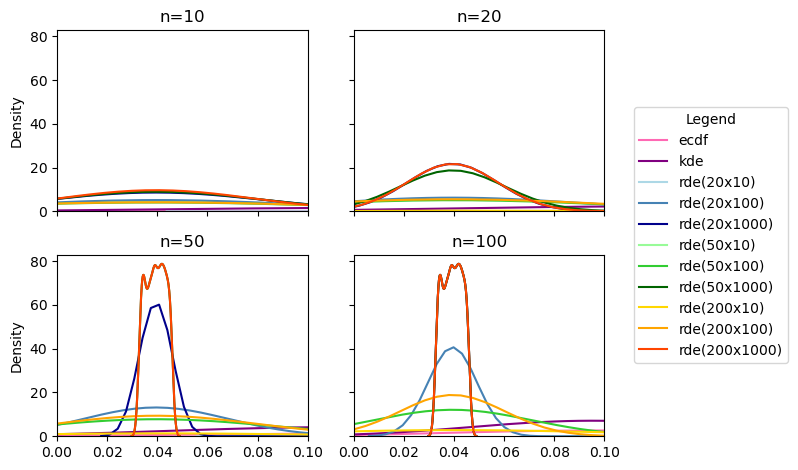

In [10]:
regrets_plot(regrets_dict["truncpareto"])